Importing Dependencies

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Uploading Dataset

lp = pd.read_excel('/content/loan approval prediction system.xlsx')

lp.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


Exploratory Data Analysis

In [ ]:
#checking the number of data points

lp.shape

(614, 13)

In [ ]:
#Getting statistic of the dataset

lp.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
#checking data infomation

lp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
#Checking for missing values

lp.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
#Use the mode to replace the missing value of the categorical column

#USe mean to replace the missing values of the continuious variable

mode_value = lp['Gender'].mode()[0]
lp['Gender'].fillna(mode_value, inplace=True)

mode_value = lp['Married'].mode()[0]
lp['Married'].fillna(mode_value, inplace=True)


mode_value = lp['Dependents'].mode()[0]
lp['Dependents'].fillna(mode_value, inplace=True)


mode_value = lp['Self_Employed'].mode()[0]
lp['Self_Employed'].fillna(mode_value, inplace=True)

#Contiuous column

mean_value = lp['LoanAmount'].mean()
lp['LoanAmount'].fillna(mean_value, inplace=True)

mean_value = lp['Loan_Amount_Term'].mean()
lp['Loan_Amount_Term'].fillna(mean_value, inplace=True)

mean_value = lp['Credit_History'].mean()
lp['Credit_History'].fillna(mean_value, inplace=True)



In [ ]:
#Checking for mising values after imputation

lp.isnull().sum()


Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Bulding Model

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [ ]:
#convert the categorical values to numerical values

label_encoder = LabelEncoder()

lp['Gender'] = label_encoder.fit_transform(lp['Gender'])

lp['Married'] = label_encoder.fit_transform(lp['Married'])

lp['Education'] = label_encoder.fit_transform(lp['Education'])

lp['Self_Employed'] = label_encoder.fit_transform(lp['Self_Employed'])

lp['Loan_Status'] = label_encoder.fit_transform(lp['Loan_Status'])

lp['Property_Area'] = label_encoder.fit_transform(lp['Property_Area'])





In [ ]:
lp['Loan_Status'].value_counts()

1    422
0    192
Name: Loan_Status, dtype: int64

In [ ]:
#convert dependants datatype from object to float

lp['Dependents'].unique()


lp['Dependents'] = lp['Dependents'].replace('3+', 3).astype(float)

In [ ]:
lp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    int64  
 2   Married            614 non-null    int64  
 3   Dependents         614 non-null    float64
 4   Education          614 non-null    int64  
 5   Self_Employed      614 non-null    int64  
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    int64  
 12  Loan_Status        614 non-null    int64  
dtypes: float64(5), int64(7), object(1)
memory usage: 62.5+ KB


In [ ]:
#Splitting dataset into predictors and target

X = lp.drop(columns = ['Loan_ID','Loan_Status'], axis=1)

Y = lp['Loan_Status']

In [ ]:
#Splitting Dataset into train and test dataset

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=42)


In [ ]:
print(X_train.shape)

print(X_test.shape)


(491, 11)
(123, 11)


In [ ]:
#Building model

svm_model = SVC(kernel='linear')

svm_model.fit(X_train, Y_train)

Y_predict = svm_model.predict(X_test)

Evaluation of Model

In [ ]:
accuracy = accuracy_score(Y_test, Y_predict)

report = classification_report(Y_test, Y_predict)

print('Accuracy:', accuracy)

print('\nClassification Report:', report)

Accuracy: 0.7967479674796748

Classification Report:               precision    recall  f1-score   support

           0       1.00      0.42      0.59        43
           1       0.76      1.00      0.86        80

    accuracy                           0.80       123
   macro avg       0.88      0.71      0.73       123
weighted avg       0.85      0.80      0.77       123



In [ ]:

from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score


def compare_models(X, Y, random_seed=42):
    # Random Forest Classifier
    rf_classifier = RandomForestClassifier(random_state=random_seed)
    rf_scores = cross_val_score(rf_classifier, X, Y, cv=5, scoring='accuracy')

    # Support Vector Classifier (SVC)
    svc_classifier = SVC(random_state=random_seed)
    svc_scores = cross_val_score(svc_classifier, X, Y, cv=5, scoring='accuracy')

    # Gaussian Naive Bayes
    nb_classifier = GaussianNB()
    nb_scores = cross_val_score(nb_classifier, X, Y, cv=5, scoring='accuracy')

    # Decision Tree Classifier
    dt_classifier = DecisionTreeClassifier(random_state=random_seed)
    dt_scores = cross_val_score(dt_classifier, X, Y, cv=5, scoring='accuracy')

    # Print the average scores
    print("Random Forest Classifier Accuracy: {:.2f}".format(np.mean(rf_scores)))
    print("SVC Accuracy: {:.2f}".format(np.mean(svc_scores)))
    print("Gaussian Naive Bayes Accuracy: {:.2f}".format(np.mean(nb_scores)))
    print("Decision Tree Classifier Accuracy: {:.2f}".format(np.mean(dt_scores)))

    # Determine the best model based on average scores
    models = {
        'Random Forest Classifier': np.mean(rf_scores),
        'SVC': np.mean(svc_scores),
        'Gaussian Naive Bayes': np.mean(nb_scores),
        'Decision Tree Classifier': np.mean(dt_scores)
    }

    best_model = max(models, key=models.get)
    return f"The best model is: {best_model} with an accuracy of {models[best_model]:.2f}"


result = compare_models(X, Y)
print(result)


Random Forest Classifier Accuracy: 0.79
SVC Accuracy: 0.69
Gaussian Naive Bayes Accuracy: 0.79
Decision Tree Classifier Accuracy: 0.70
The best model is: Gaussian Naive Bayes with an accuracy of 0.79


RandomForest Model Optimization

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# Define the RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=42)

# Define the hyperparameters to search through
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the model to the data
grid_search.fit(X_train, Y_train)

# Print the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model
best_rf_model = grid_search.best_estimator_

# Evaluate the best model on the test set
accuracy = best_rf_model.score(X_test, Y_test)
print("Best Model Accuracy on Test Set:", accuracy)

Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 50}
Best Model Accuracy on Test Set: 0.7804878048780488


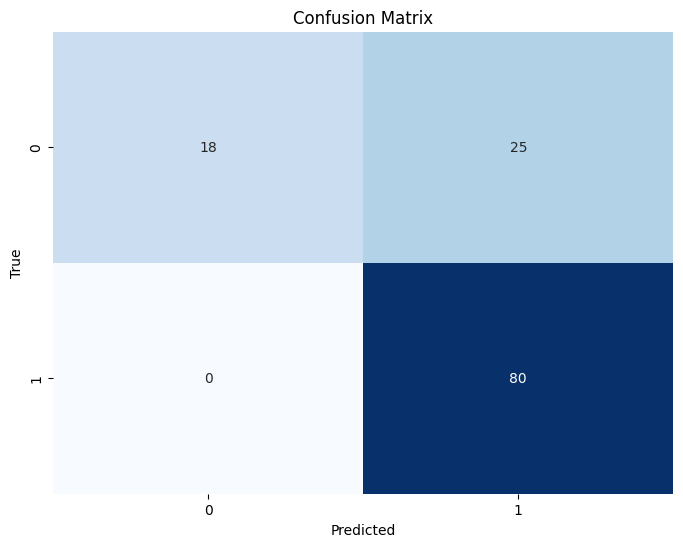

In [ ]:
# Create a confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_predict)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()